# Import statements

In [1]:
!pip install pycountry_convert
!pip install scikit_optimize
!pip install catboost
!pip install pandas-profiling
!pip install pydot
!pip install pyqt5

     |████████████████████████████████| 10.1 MB 3.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 207 kB 42.8 MB/s 
     |████████████████████████████████| 296 kB 50.1 MB/s 
     |████████████████████████████████| 296 kB 6.6 MB/s 
     |████████████████████████████████| 280 kB 37.5 MB/s 
     |████████████████████████████████| 280 kB 42.9 MB/s 
     |████████████████████████████████| 280 kB 48.4 MB/s 
     |████████████████████████████████| 280 kB 47.6 MB/s 
     |████████████████████████████████| 279 kB 46.5 MB/s 
     |████████████████████████████████| 279 kB 53.6 MB/s 
     |████████████████████████████████| 272 kB 49.8 MB/s 
     |████████████████████████████████| 272 kB 44.3 MB/s 
     |████████████████████████████████| 272 kB 50.3 MB/s 
     |████████████████████████████████| 270 kB 46.7 MB/s 
     |████████████████████████████████| 270 kB 44.0 MB/s 
     

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import seaborn
import pycountry_convert as pc
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools
from IPython.display import Image
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
from tempfile import mkdtemp
from joblib import Memory
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=5)
%matplotlib inline
import lightgbm as lgb

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/tmp/tmp0zymt_ns'", use "location='/tmp/tmp0zymt_ns'" instead.


In [3]:
import sys
runningOnColab = 'google.colab' in sys.modules
if runningOnColab:
  from google.colab import drive
  drive.mount('/content/drive')
  %cd '/content/drive/Shareddrives/ECE219/Project4/Dataset'

Mounted at /content/drive
/content/drive/Shareddrives/ECE219/Project4/Dataset


# Read Datasets

In [4]:
diamonds_data = pd.read_csv('D1_Diamonds/diamonds.csv', index_col=0)
print(diamonds_data.head())
print(diamonds_data.describe())
diamonds_data.describe(include=object)

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    330  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    327  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    328  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    337  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    338  4.34  4.35  2.75
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3934.801557      5.731157   
std        0.474011      1.432621      2.234491   3989.442321      1.121761   
min        0.200000     43.000000     43.000000    327.000000      0.000000   
25%        0.400000     61.000000     56.000000    952.000000      4.710000   
50%        0.700000     61.800000     57.000000   2403.000000      5.700000   
75%        1.040000  

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [5]:
diamonds_data_cat = diamonds_data.copy()
diamonds_data_cat['cut'].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], [1, 2, 3, 4, 5], inplace=True)
diamonds_data_cat['color'].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
diamonds_data_cat['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

In [6]:
scalar = StandardScaler()
diamonds_data_S = scalar.fit_transform(diamonds_data_cat)
diamonds_data_S_df = pd.DataFrame(diamonds_data_S, columns = diamonds_data_cat.columns)
print('diamonds_data_S_df')
print(diamonds_data_S_df.describe())

diamonds_data_S_df
              carat           cut         color       clarity         depth  \
count  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04   
mean   2.889982e-14 -1.165888e-14 -1.709256e-14 -6.358149e-15 -3.658830e-15   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.261458e+00 -2.600864e+00 -2.002131e+00 -1.852335e+00 -1.308760e+01   
25%   -8.395232e-01 -8.096951e-01 -8.264134e-01 -6.380951e-01 -5.231053e-01   
50%   -2.066210e-01  8.588908e-02 -2.385547e-01 -3.097505e-02  3.531678e-02   
75%    5.106683e-01  9.814733e-01  9.371628e-01  5.761450e-01  5.239361e-01   
max    8.886075e+00  9.814733e-01  1.525021e+00  2.397505e+00  1.204139e+01   

              table         price             x             y             z  
count  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  
mean   1.274832e-14  1.262602e-14  1.034809e-14 -3.139766e-15 -7.314273e-15  
std    1.000009e+00  1.000009e+00  

In [7]:
X_diamond_S = diamonds_data_S_df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'depth', 'table']]
Y_diamond_S_df = diamonds_data_S_df[['price']]
Y_diamond_S = diamonds_data_S_df.price

print('X_diamond_S')
print(X_diamond_S.head())
print(X_diamond_S.describe())

print('Y_diamond_S')
print(Y_diamond_S_df.head())
print(Y_diamond_S_df.describe())

X_diamond_S
      carat       cut     color   clarity         x         y         z  \
0 -1.198168  0.981473  0.937163 -1.245215 -1.587837 -1.536196 -1.571129   
1 -1.240361  0.085889  0.937163 -0.638095 -1.641325 -1.658774 -1.741175   
2 -1.198168 -1.705279  0.937163  0.576145 -1.498691 -1.457395 -1.741175   
3 -1.071587  0.085889 -1.414272 -0.030975 -1.364971 -1.317305 -1.287720   
4 -1.029394 -1.705279 -2.002131 -1.245215 -1.240167 -1.212238 -1.117674   

      depth     table  
0 -0.174092 -1.099672  
1 -1.360738  1.585529  
2 -3.385019  3.375663  
3  0.454133  0.242928  
4  1.082358  0.242928  
              carat           cut         color       clarity             x  \
count  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04   
mean   2.889982e-14 -1.165888e-14 -1.709256e-14 -6.358149e-15  1.034809e-14   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.261458e+00 -2.600864e+00 -2.002131e+00 -1.852335e+00 -5.109120e+00  

# Question 22

In [8]:
opt = BayesSearchCV(
    lgb.LGBMRegressor(random_state = 42, verbose = 1, n_jobs = -1),
    {
        'boosting_type': ['gbdt', 'dart', 'rf'],
        'num_leaves': np.arange(4, 1000, 10),
        'max_depth': np.arange(1, 100, 10),
        'n_estimators': np.arange(10, 4000, 100),
        'reg_alpha': [10.0**x for x in np.arange(-4, 4)],
        'reg_lambda': [10.0**x for x in np.arange(-4, 4)],
        'subsample': np.arange(0.1, 1, 0.1),
        'subsample_freq': np.arange(0, 50, 5),
        'min_split_gain': [10.0**x for x in np.arange(-4, 0)],
        'bagging_fraction' : [0.4, 0.6, 0.8],
        "bagging_freq" : [1, 2], 
        "bagging_seed" : [2018],
    },
    n_iter = 10,
    cv = 5,
    n_jobs = -1,
    verbose = 3,
    random_state = 42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [9]:
selK = SelectKBest(score_func = f_regression, k = 6)
X_diamond_df_topk = selK.fit_transform(X_diamond_S, Y_diamond_S)

grid = opt.fit(X_diamond_df_topk, Y_diamond_S)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [10]:
result = pd.DataFrame(grid.cv_results_)[['mean_test_score','mean_train_score','param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda','param_subsample','param_subsample_freq',
              'param_min_split_gain']]
results = result.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
results.to_csv('diamonds_lgbm.csv', sep='\t', encoding='utf-8')
print('Best parameters (diamonds):',opt.best_params_,',Test RMSE:',opt.best_score_)
print('Train RMSE:',min(opt.cv_results_['mean_train_score']))

Best parameters (diamonds): OrderedDict([('bagging_fraction', 0.6), ('bagging_freq', 2), ('bagging_seed', 2018), ('boosting_type', 'gbdt'), ('max_depth', 21), ('min_split_gain', 0.001), ('n_estimators', 610), ('num_leaves', 750), ('reg_alpha', 1.0), ('reg_lambda', 1000.0), ('subsample', 0.7000000000000001), ('subsample_freq', 15)]) ,Test RMSE: -0.27880349861566034
Train RMSE: -0.38219226480716817


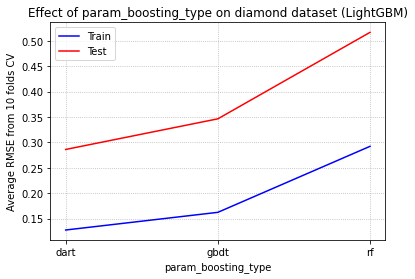

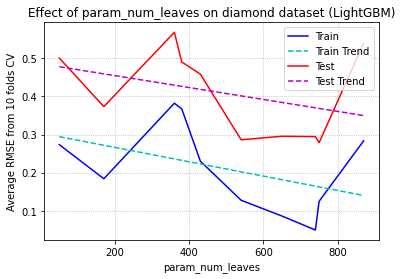

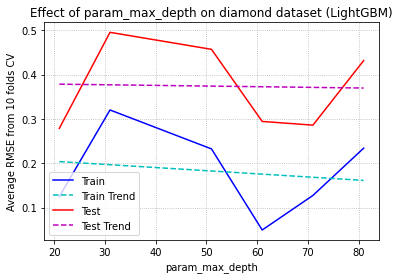

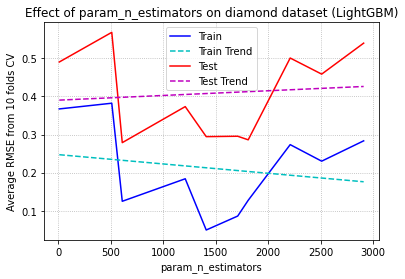

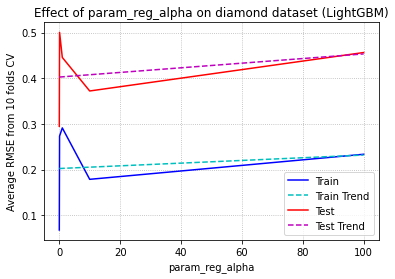

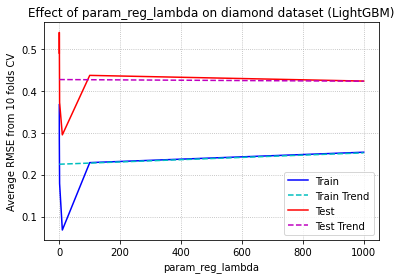

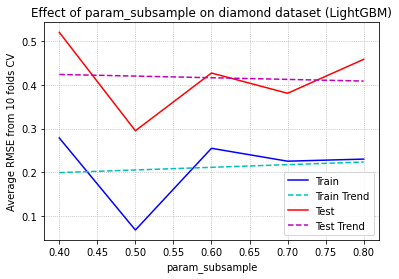

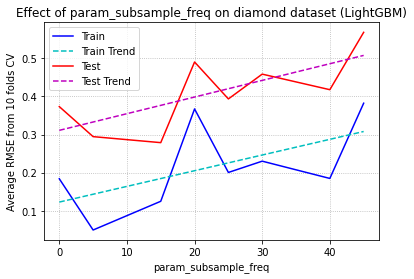

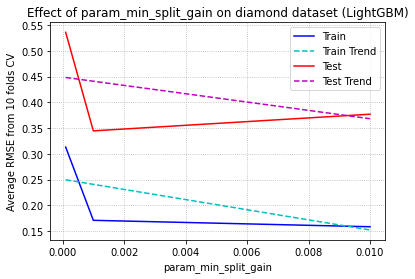

In [11]:
param_list = ['param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda','param_subsample','param_subsample_freq',
              'param_min_split_gain'] 
for param in param_list:
    param_set = sorted(list(set(opt.cv_results_[param])))
    param_trainscore = []
    param_testscore = []

    for item in param_set:
        param_trainscore.append(np.mean([opt.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opt.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 

    param_trainscore = np.negative(param_trainscore)    
    param_testscore = np.negative(param_testscore)   
    
    plt.plot(param_set, param_trainscore, label="Train", color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set, np.poly1d(np.polyfit(param_set, param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set, np.poly1d(np.polyfit(param_set, param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE from 10 folds CV')
    plt.title("Effect of %s on diamond dataset (LightGBM)" % param)
    plt.show()

# CatBoost

In [8]:
opt = BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.5,1,0.1),
        'num_trees': np.arange(10,4000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,4)],
        'num_leaves': np.arange(20,1000,10),
        'max_depth': np.arange(1,16,2),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['Lossguide'],
        
    },
    n_iter=10,
    cv=5,
    n_jobs=1,
    verbose=3,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [9]:
selK = SelectKBest(score_func = f_regression, k = 6)
X_diamond_df_topk = selK.fit_transform(X_diamond_S, Y_diamond_S)

grid = opt.fit(X_diamond_df_topk, Y_diamond_S)

Streaming output truncated to the last 5000 lines.
332:	learn: 0.1271654	total: 13.1s	remaining: 34.6s
333:	learn: 0.1270673	total: 13.2s	remaining: 34.5s
334:	learn: 0.1270073	total: 13.2s	remaining: 34.5s
335:	learn: 0.1269407	total: 13.2s	remaining: 34.4s
336:	learn: 0.1268845	total: 13.3s	remaining: 34.4s
337:	learn: 0.1268842	total: 13.3s	remaining: 34.2s
338:	learn: 0.1267714	total: 13.3s	remaining: 34.2s
339:	learn: 0.1266884	total: 13.4s	remaining: 34.2s
340:	learn: 0.1265842	total: 13.4s	remaining: 34.1s
341:	learn: 0.1265622	total: 13.4s	remaining: 34.1s
342:	learn: 0.1264130	total: 13.5s	remaining: 34.1s
343:	learn: 0.1263697	total: 13.5s	remaining: 34s
344:	learn: 0.1263372	total: 13.6s	remaining: 34s
345:	learn: 0.1263121	total: 13.6s	remaining: 34s
346:	learn: 0.1262529	total: 13.6s	remaining: 33.9s
347:	learn: 0.1262103	total: 13.7s	remaining: 33.8s
348:	learn: 0.1260789	total: 13.7s	remaining: 33.8s
349:	learn: 0.1259916	total: 13.7s	remaining: 33.8s
350:	learn: 0.12586

In [10]:
result = pd.DataFrame(grid.cv_results_)[['mean_test_score','mean_train_score','param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg',
              'param_num_leaves','param_bagging_temperature', 'param_grow_policy']]
results = result.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
results.to_csv('diamonds_cat.csv', sep='\t', encoding='utf-8')
print('Best parameters (diamonds):',opt.best_params_,',Test RMSE:',opt.best_score_)


Best parameters (diamonds): OrderedDict([('bagging_temperature', 7.1), ('colsample_bylevel', 0.6), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 100.0), ('max_depth', 9), ('num_leaves', 110), ('num_trees', 2910)]) ,Test RMSE: -0.2822963091073037


In [11]:
optcat = BayesSearchCV(
    CatBoostRegressor(random_state=42, verbose=1, thread_count=-1, bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.5,0.9,0.1),
        'num_trees': np.arange(10,1000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,4)],
        'max_depth': np.arange(1,16,2),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['SymmetricTree'],
        'score_function': ['Cosine','L2']
        
    },
    n_iter=10,
    cv=5,
    n_jobs=1,
    verbose=3,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [12]:
selK = SelectKBest(score_func = f_regression, k = 6)
X_diamond_df_topk = selK.fit_transform(X_diamond_S, Y_diamond_S)

grid2 = optcat.fit(X_diamond_df_topk, Y_diamond_S)

Streaming output truncated to the last 5000 lines.
245:	learn: 0.1445262	total: 24.2s	remaining: 6.29s
246:	learn: 0.1444739	total: 24.3s	remaining: 6.19s
247:	learn: 0.1444506	total: 24.4s	remaining: 6.09s
248:	learn: 0.1444130	total: 24.5s	remaining: 6s
249:	learn: 0.1443327	total: 24.6s	remaining: 5.9s
250:	learn: 0.1442596	total: 24.7s	remaining: 5.8s
251:	learn: 0.1441700	total: 24.8s	remaining: 5.71s
252:	learn: 0.1441246	total: 24.9s	remaining: 5.61s
253:	learn: 0.1440588	total: 25s	remaining: 5.52s
254:	learn: 0.1440275	total: 25.1s	remaining: 5.42s
255:	learn: 0.1440072	total: 25.2s	remaining: 5.32s
256:	learn: 0.1439394	total: 25.3s	remaining: 5.22s
257:	learn: 0.1438647	total: 25.4s	remaining: 5.12s
258:	learn: 0.1437923	total: 25.5s	remaining: 5.02s
259:	learn: 0.1437443	total: 25.6s	remaining: 4.92s
260:	learn: 0.1436591	total: 25.7s	remaining: 4.83s
261:	learn: 0.1436320	total: 25.8s	remaining: 4.73s
262:	learn: 0.1435701	total: 25.9s	remaining: 4.63s
263:	learn: 0.143545

In [13]:
result2 = pd.DataFrame(grid2.cv_results_)[['mean_test_score','mean_train_score','param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg',
              'param_score_function','param_bagging_temperature', 'param_grow_policy']]
results2 = result2.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
results2.to_csv('diamonds_cat2.csv', sep='\t', encoding='utf-8')
print('Best parameters (diamonds):',optcat.best_params_,',Test RMSE:',optcat.best_score_)


Best parameters (diamonds): OrderedDict([('bagging_temperature', 0.1), ('colsample_bylevel', 0.7), ('grow_policy', 'SymmetricTree'), ('l2_leaf_reg', 0.01), ('max_depth', 9), ('num_trees', 210), ('score_function', 'Cosine')]) ,Test RMSE: -0.28381957493683774


In [14]:
def join_list(param_set_1,param_set_2,param_score_1,param_score_2):
    names = param_set_1 + param_set_2
    results_values = param_score_1 + param_score_2
    averages = {}
    counts = {}
    for name, value in zip(names, results_values):
        if name in averages:
            averages[name] += value
            counts[name] += 1
        else:
            averages[name] = value
            counts[name] = 1
    for name in averages:
        averages[name] = averages[name]/float(counts[name])
    comb_param_set = list(averages.keys())
    comb_score = list(averages.values())
    return comb_param_set, comb_score

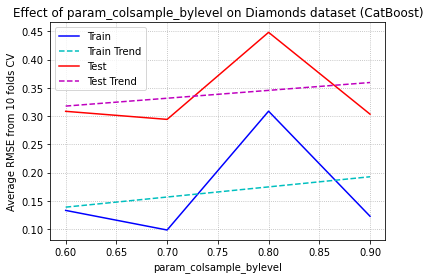

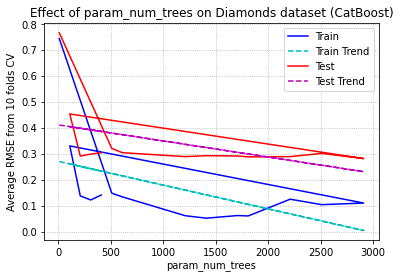

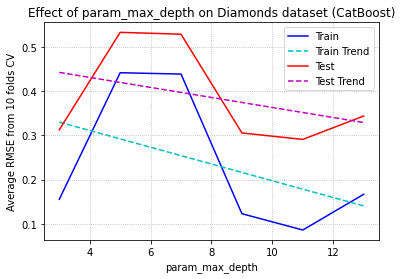

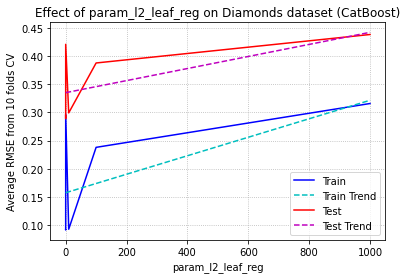

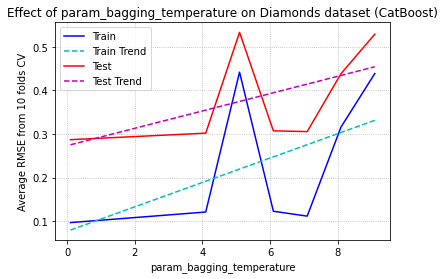

In [16]:
param_list = ['param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg','param_bagging_temperature'] 
for param in param_list:
    param_set = sorted(list(set(opt.cv_results_[param])))
    param_set_2 = sorted(list(set(optcat.cv_results_[param])))
    param_trainscore = []
    param_trainscore_2 = []
    param_testscore = []
    param_testscore_2 = []
    for item in param_set:
        param_trainscore.append(np.mean([opt.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opt.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
    for it in param_set_2:
        param_trainscore_2.append(np.mean([optcat.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == it]])) 
        param_testscore_2.append(np.mean([optcat.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == it]])) 
        
    comb_param_set, comb_trainscore = join_list(param_set,param_set_2,param_trainscore,param_trainscore_2)
    comb_param_set, comb_testscore = join_list(param_set,param_set_2,param_testscore,param_testscore_2)

    comb_trainscore = np.negative(comb_trainscore)
    comb_testscore = np.negative(comb_testscore)
    
    plt.plot(comb_param_set,comb_trainscore,label="Train",color='b')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_trainscore,1))(comb_param_set),'--',label="Train Trend",color='c')
    plt.plot(comb_param_set,comb_testscore,label="Test",color='r')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_testscore,1))(comb_param_set),'--',label="Test Trend",color='m')
    
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE from 10 folds CV')
    plt.title("Effect of %s on Diamonds dataset (CatBoost)" % param)
    plt.show()

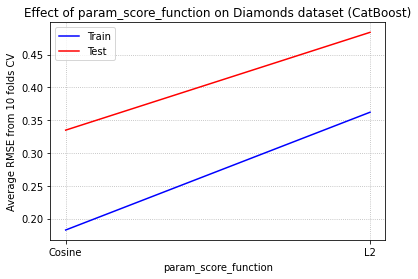

In [17]:
param_list = ['param_score_function'] 
for param in param_list:
    param_set = sorted(list(set(optcat.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([optcat.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([optcat.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
    
    param_trainscore = np.negative(param_trainscore)
    param_testscore = np.negative(param_testscore)
    
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE from 10 folds CV')
    plt.title("Effect of %s on Diamonds dataset (CatBoost)" % param)
    plt.show()

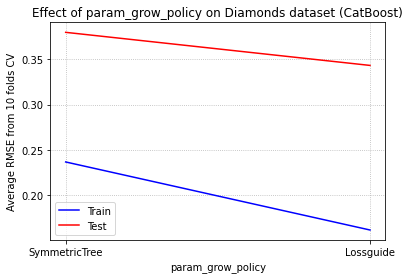

In [18]:
param_list = ['param_grow_policy'] 
for param in param_list:
    param_set = sorted(list(set(optcat.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([optcat.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([optcat.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
    param_trainscore.append(np.mean(opt.cv_results_['mean_train_score']))
    param_testscore.append(np.mean(opt.cv_results_['mean_test_score']))

    param_trainscore = np.negative(param_trainscore)
    param_testscore = np.negative(param_testscore)

    param_set.append('Lossguide')
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE from 10 folds CV')
    plt.title("Effect of %s on Diamonds dataset (CatBoost)" % param)
    plt.show()

In [ ]:
'param_num_leaves'

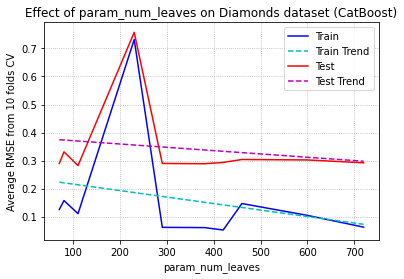

In [19]:
param_list = ['param_num_leaves'] 
for param in param_list:
    param_set = sorted(list(set(opt.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opt.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opt.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
    
    param_trainscore = np.negative(param_trainscore)
    param_testscore = np.negative(param_testscore)
    
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE from 10 folds CV')
    plt.title("Effect of %s on Diamonds dataset (CatBoost)" % param)
    plt.show()